In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1 + np.exp(-z))

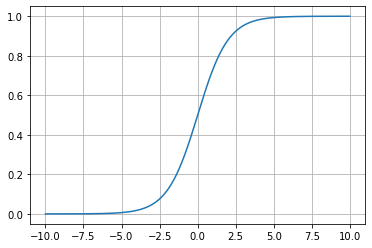

In [3]:
import matplotlib.pyplot as plt

plt.plot(z, g)
plt.grid()
plt.show()

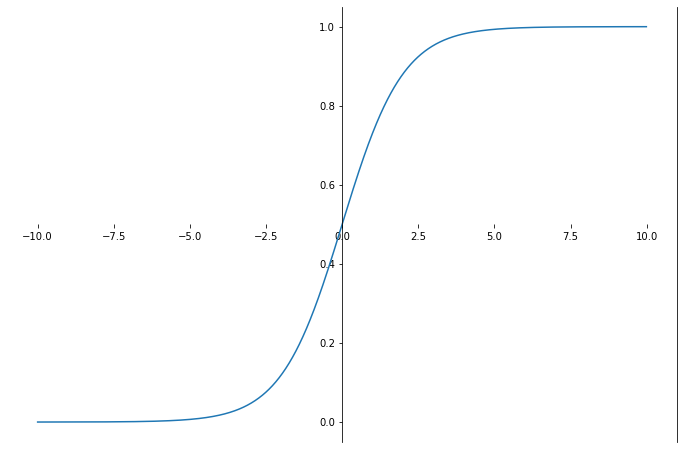

In [10]:
plt.figure(figsize=(12, 8))
ax = plt.gca() # 설정값 변경할 수 있는 함수?
ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

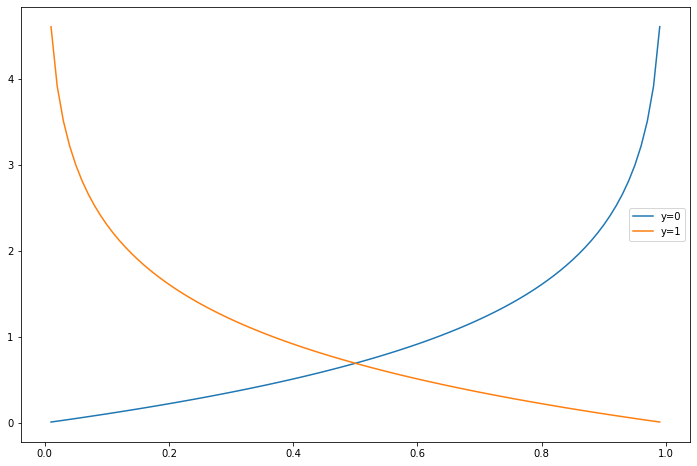

In [12]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12, 8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')
plt.legend()
plt.show()

In [13]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
X = wine.drop(['taste', 'quality'], axis =1)
y = wine['taste']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [21]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7425437752549547
Test Acc : 0.7438461538461538


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [28]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7444679622859341
Test Acc : 0.7469230769230769


In [29]:
from sklearn.tree  import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {
    'logistic regression' : pipe,
    'decision tree' : wine_tree
}

In [34]:
from sklearn.metrics import roc_curve

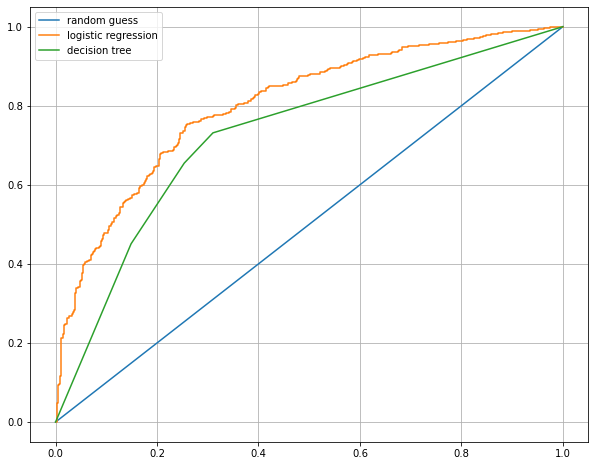

In [35]:
plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1], label='random guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

In [36]:
import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
PIMA = pd.read_csv(PIMA_url)
PIMA.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot:>

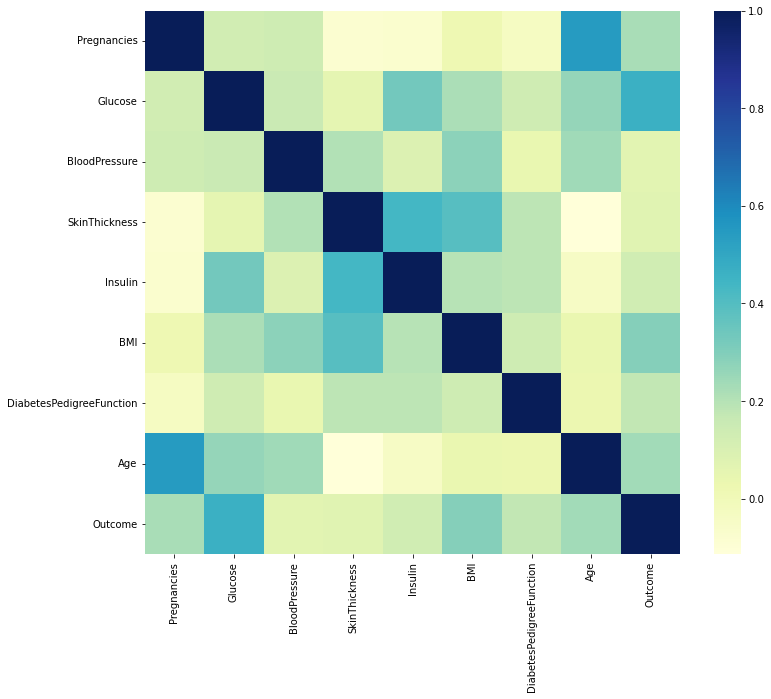

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')

In [41]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [42]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())

In [43]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [46]:
X = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)

In [47]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

print('Accuracy :', accuracy_score(y_test, pred)) 
print('Recall :', recall_score(y_test, pred)) 
print('Precision :', precision_score(y_test, pred)) 
print('AUC score :', roc_auc_score(y_test, pred)) 
print('F1 score :', f1_score(y_test, pred)) 

Accuracy : 0.7727272727272727
Recall : 0.6111111111111112
Precision : 0.7021276595744681
AUC score : 0.7355555555555556
F1 score : 0.6534653465346535


In [52]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [54]:
features = pd.DataFrame(
    {'Features': labels, 'importance':coeff}
)
features.sort_values(by=['importance'], ascending=True, inplace=True)

In [55]:
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [56]:
features['positive'] = features['importance'] > 0

In [57]:
features

,Features,importance,positive
4,Insulin,-0.162865,False
2,BloodPressure,-0.158401,False
3,SkinThickness,0.033947,True
7,Age,0.171960,True
0,Pregnancies,0.354266,True
6,DiabetesPedigreeFunction,0.366694,True
5,BMI,0.620405,True
1,Glucose,1.201424,True


In [58]:
features.set_index('Features', inplace=True)

In [59]:
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


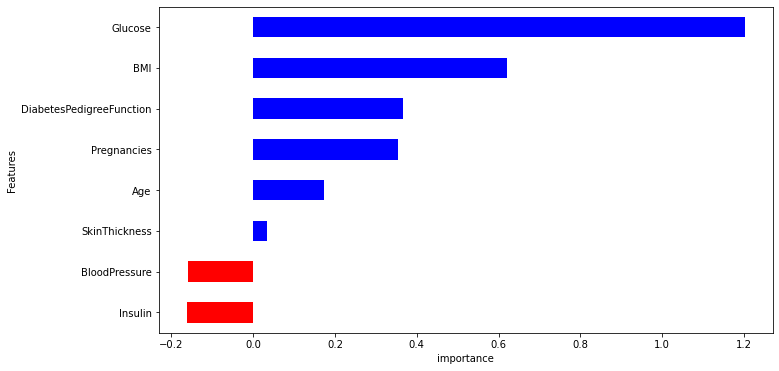

In [61]:
features['importance'].plot(kind='barh', figsize=(11, 6), color=features['positive'].map({True: 'blue', False: 'red'}))
plt.xlabel('importance')
plt.show()